<a href="https://colab.research.google.com/github/Rothy-0x/PA-Datmin-Kelompok6/blob/main/PA_Kelompok_6_Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Crisp-DM Supervised Data

## Business Understanding

Sumber Dataset: https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset

1. **Tujuan Penggunaan Dataset**: Tujuan penggunaan dataset ini adalah untuk melakukan analisis terhadap data pasien dengan penyakit jantung. Data yang tersedia pada dataset ini meliputi informasi demografi, faktor risiko, gejala klinis, dan hasil tes medis. Dengan menganalisis dataset ini, kita dapat mengidentifikasi faktor risiko dan gejala klinis yang paling signifikan dalam penyakit jantung dan membangun model prediksi untuk mendiagnosis penyakit jantung.


2. **Tujuan Perusahaan**: Tujuan perusahaan dalam melakukan analisis ini adalah untuk meningkatkan kualitas layanan kesehatan dengan memberikan diagnosis yang lebih akurat dan cepat bagi pasien yang diduga menderita penyakit jantung. Selain itu, perusahaan juga dapat menggunakan hasil analisis untuk melakukan tindakan pencegahan dan pengobatan yang lebih efektif pada pasien yang memiliki risiko tinggi terkena penyakit jantung.


3. **Tujuan Penggunaan Data Minings**: Tujuan data mining dari dataset "Heart Disease Dataset" yang tersedia di Kaggle adalah untuk mengidentifikasi faktor-faktor risiko yang terkait dengan penyakit jantung dan untuk membangun model prediksi yang dapat digunakan untuk memprediksi apakah seseorang menderita penyakit jantung berdasarkan informasi klinis yang tersedia. Dalam konteks ini, data mining dapat membantu para peneliti dan profesional kesehatan dalam mengembangkan strategi pencegahan yang lebih efektif, memahami faktor-faktor yang mempengaruhi penyakit jantung, dan memperbaiki pengobatan serta diagnosis pasien yang menderita penyakit jantung.

## Data Understanding

##### Collect Data

In [1]:
# import library yang dibutuhkan 
import pandas as pd


# Load dataset dalam DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Final-Project-Datmin/dataset/main/heart_disease.csv')

df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


##### Describe Data

In [2]:
df.describe()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000
mean,49.584946,0.494101,9.003089,0.029630,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753
std,8.572160,0.500024,11.920094,0.169584,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,1.000000,20.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000
max,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


1. count: menunjukkan jumlah nilai non-null dalam setiap kolom dataset.

2. mean: menunjukkan nilai rata-rata dari setiap kolom dataset.

3. std: menunjukkan standar deviasi dari setiap kolom dataset.

3. min: menunjukkan nilai minimum dari setiap kolom dataset.

4. 25%: menunjukkan kuartil pertama dari setiap kolom dataset, kuartil pertama adalah nilai yang membagi dataset menjadi dua bagian yang sama besar.

5. 50%: menunjukkan kuartil kedua dari setiap kolom dataset, kuartil kedua atau median adalah nilai tengah dari dataset.

6. 75%: menunjukkan kuartil ketiga dari setiap kolom dataset, kuartil ketiga adalah nilai yang membagi dataset menjadi dua bagian yang sama besar.

7. max: menunjukkan nilai maksimum dari setiap kolom dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


### Explore Data

Setiap kolom atau fitur akan divisualisasikan ke dalam plot, tidak terkecuali kolom yang bertipe numerik maupun kategorikal. Visualisasi akan dibagi menjadi dua tahap, yaitu **Univariate** dan **Bivariate**

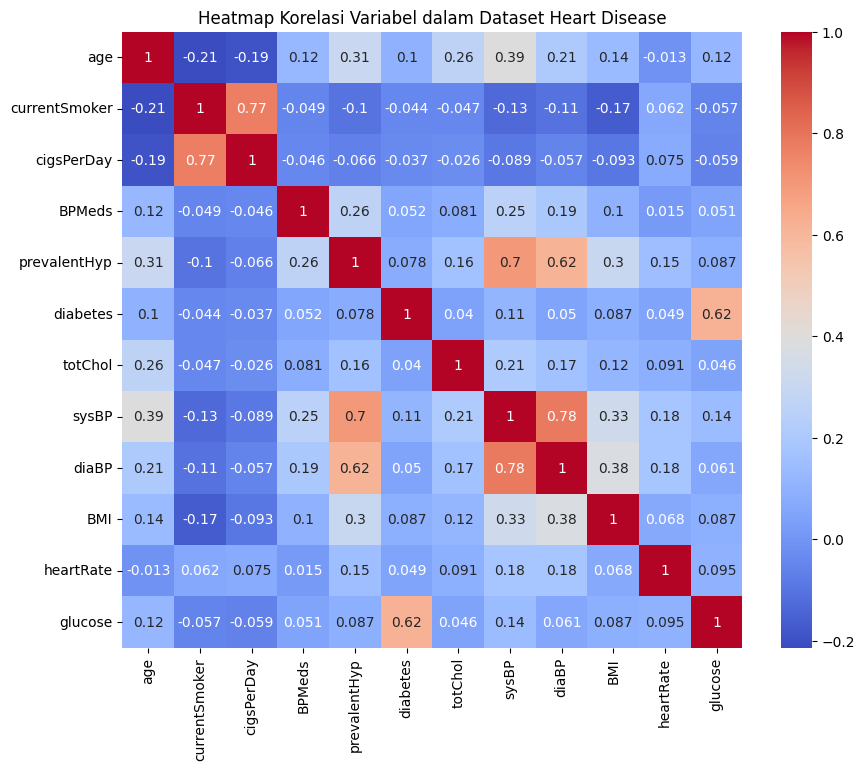

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# membuat matriks korelasi
corr_matrix = df.corr(numeric_only=True)

# membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Variabel dalam Dataset Heart Disease')
plt.show()

<ipython-input-5-4e4aef70eab0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['age'] == df_std.head(1).index[0]]['glucose'])


Text(0.5, 1.0, 'The Glucose  #62')

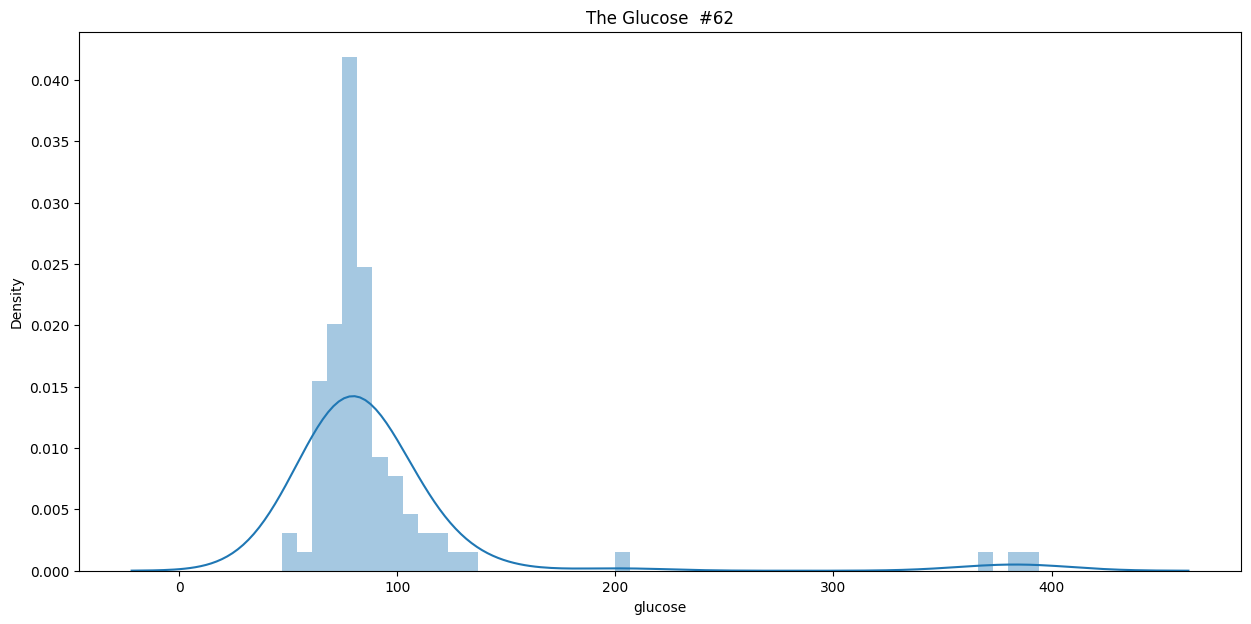

In [5]:
df_std = pd.DataFrame(df.groupby('age')['glucose'].std().sort_values(ascending=False))

plt.figure(figsize=(15,7))
sns.distplot(df[df['age'] == df_std.head(1).index[0]]['glucose'])
plt.title('The Glucose  #'+ str(df_std.head(1).index[0]))

##### Unvariate

Visualisasi yang hanya akan melihat distribusi dari tiap - tiap kolom saja

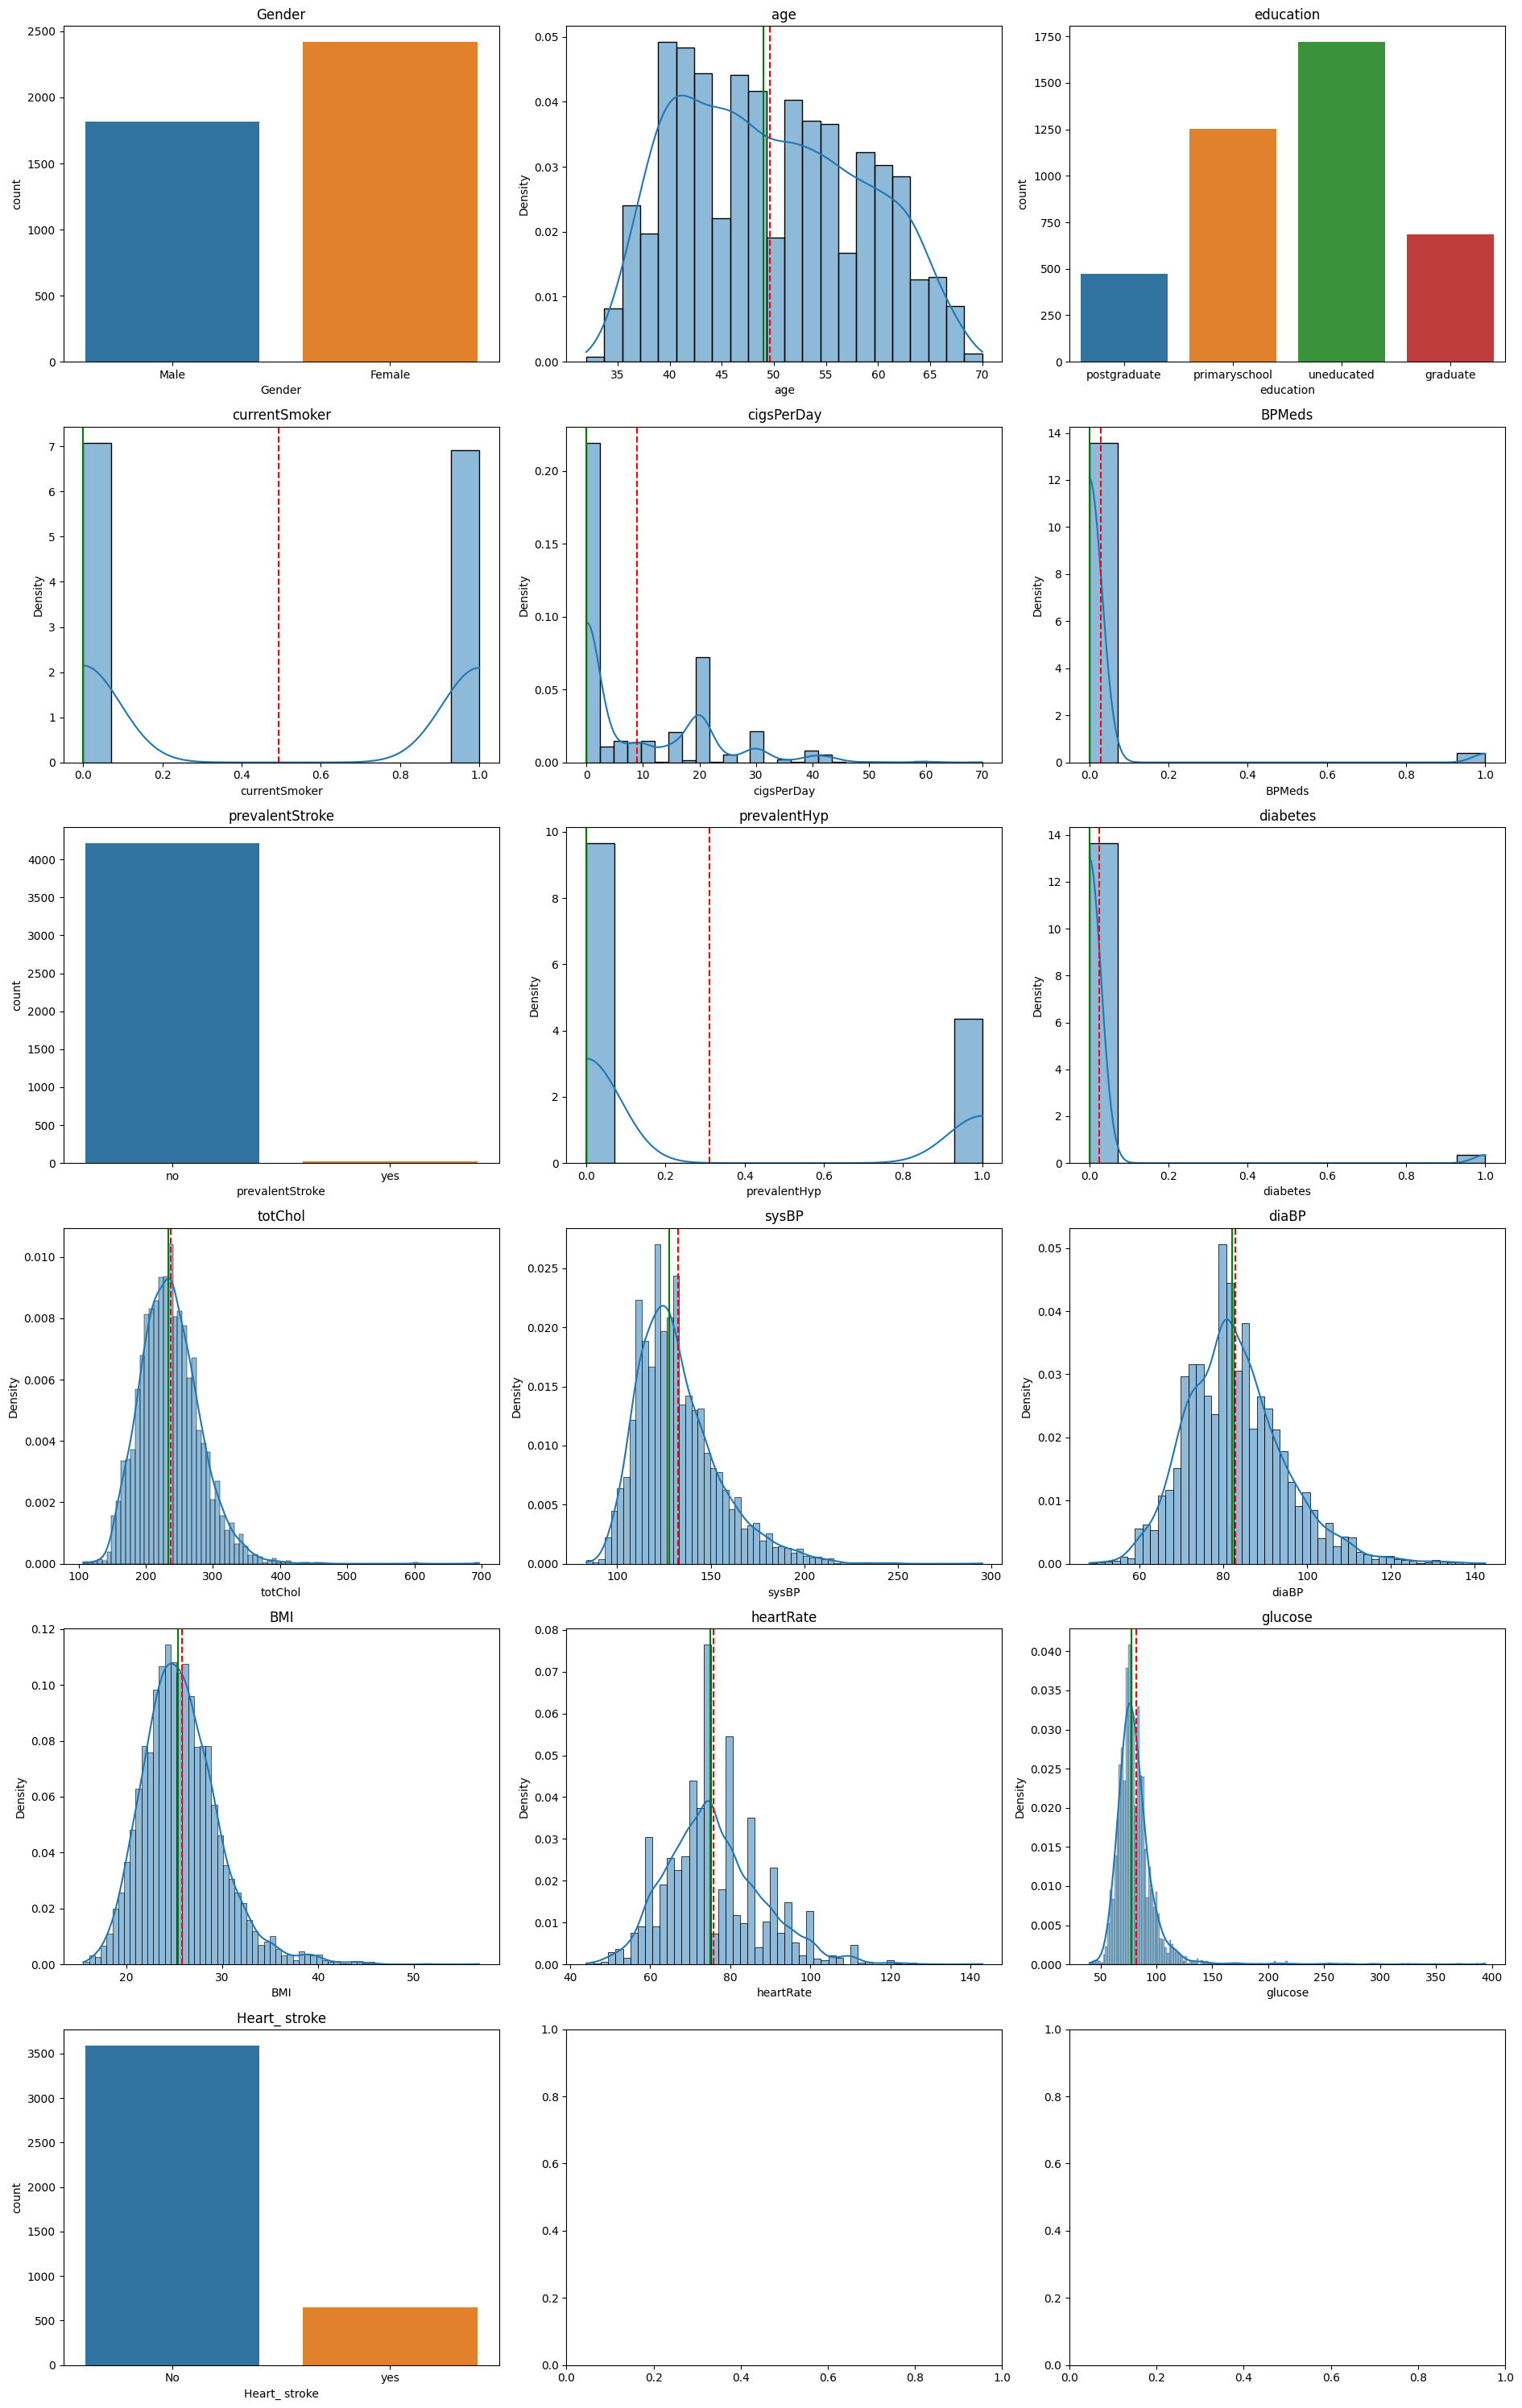

In [6]:
df_numeric = df.select_dtypes(include=['float64', 'int64', 'bool', 'object'])

num_rows = int((df_numeric.shape[1] + 2) / 3)  # Update for 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(19, 5 * num_rows))  # Update for 3 columns
axes = axes.ravel()

for i, col in enumerate(df_numeric.columns):
    if df_numeric[col].dtype in ['float64', 'int64']:
        sns.histplot(data=df_numeric, x=col, kde=True, stat='density', ax=axes[i])
        mean = df_numeric[col].mean()
        median = df_numeric[col].median()
        axes[i].axvline(mean, color='r', linestyle='--', label='Mean')
        axes[i].axvline(median, color='g', linestyle='-', label='Median')
    elif df_numeric[col].dtype == 'object':
        sns.countplot(data=df_numeric, x=col, ax=axes[i])
    elif df_numeric[col].dtype == 'bool':
        sns.countplot(data=df_numeric, x=col, ax=axes[i])
        axes[i].set_xticklabels(['False', 'True'])
    
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Berdasarkan visualisasi yang terlihat, dapat diketahui bahwa kurva yang terbentuk pada histogram kolom numerik mendekati kurva distribusi normal karena memiliki bentuk *bell-shaped*. Sehingga dapat diasumsikan bahwa kolom numerik tersebut memiliki kemungkinan besar didistribusikan secara normal

##### Bivariate

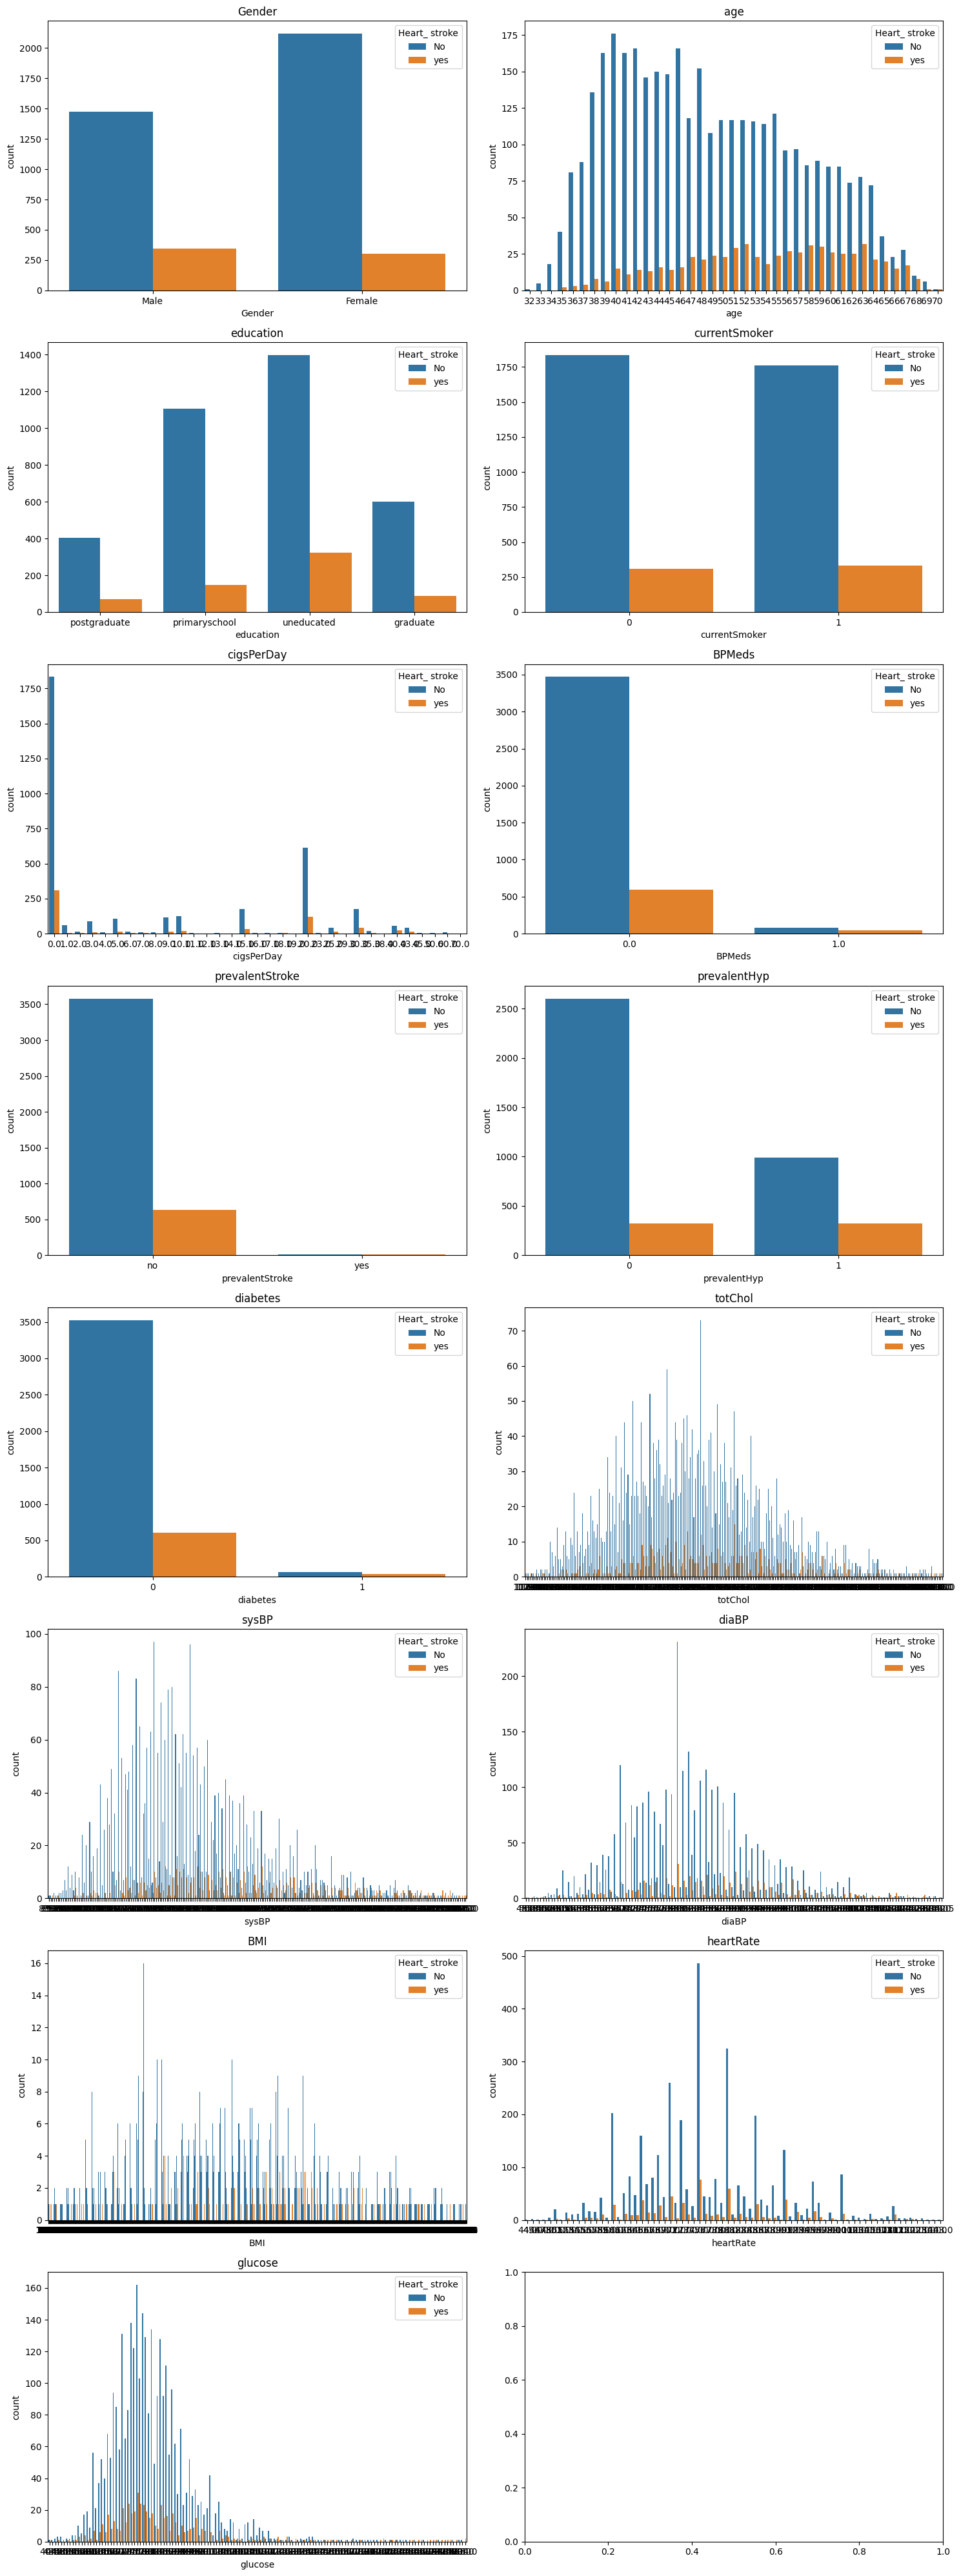

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
df_numeric = df.select_dtypes(include=['float64', 'int64', 'object'])

# Define number of rows
num_rows = int((df_numeric.shape[1] + 1) / 2)

# Define subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))

# Flatten axes for iteration
axes = axes.ravel()

# Iterate over columns
for i, col in enumerate(df_numeric.columns):
    if col == 'Heart_ stroke':
        continue
    else:
        sns.countplot(data=df_numeric, x=col, hue='Heart_ stroke', ax=axes[i])
        axes[i].set_title(col)
        axes[i].legend(title='Heart_ stroke', loc='upper right')
        
plt.tight_layout()
plt.show()


Berdasarkan visualisasi di atas, dapat dilihat distribusi antara kolom kategorikal dengan kolom target yaitu ***'Heart_ stroke'***. Selain itu dapat dilihat juga distribusi antara kolom numerik dengan kolom target, pada distibusi antara **'rata-rata nilai'** dan **'glucose'** terdapat titik - titk yang terletak di luar garis batas dari boxplot, hal ini menandakan bahwa pada kolom tersebut memiliki beberapa outliers yang akan dipertimbangkan dan diatasi dengan metode yang tepat agar tidak mengganggu analisis data

In [8]:
df.isna().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [9]:
df[df.duplicated()]

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke


In [10]:
# List untuk menyimpan hasil
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
currentSmoker,0.000000
cigsPerDay,0.283152
BPMeds,2.925908
prevalentHyp,0.000000
diabetes,2.571968
totChol,1.321378
sysBP,2.973101
diaBP,1.911279
BMI,2.288815


## Data Preparation

### Collect Data

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Data yang dipilih adalah data yang bersumber dari kaggle dan sudah diekspor ke dalam github agar lebih mudah digunakan. Data ini berisikan 4238 baris dan 16 kolom dengan 15 kolom fitur dan 1 kolom target yang bernama **'Heart_ stroke'** 

In [12]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [14]:
df.sample()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
3125,Male,39,graduate,0,0.0,0.0,no,0,0,221.0,126.0,80.0,23.9,64.0,80.0,No


### Cleaning Data

Melakukan penghapusan kolom **education**, penghapusan data duplikan , penghapusan data nilai not a number

In [15]:
df.isna().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [16]:
df.drop(columns=["education"],inplace=True)

In [17]:

df_dropna = df.dropna()

In [18]:
df_dropna.isna().sum()

Gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [19]:
df_dropna[df_dropna.duplicated()]

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke


In [20]:
df

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [21]:
cols = df_dropna.select_dtypes(include=['float64', 'int64'])

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df_dropna[col].quantile(0.25)
    q3 = df_dropna[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df_dropna[(df_dropna[col] < lower_bound) | (df_dropna[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df_dropna))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.000000
currentSmoker,0.000000
cigsPerDay,0.293412
BPMeds,3.040811
prevalentHyp,0.000000
diabetes,2.720726
totChol,1.120299
sysBP,2.934116
diaBP,1.840491
BMI,2.293945


Tabel di atas menunjukkan persentase outliers pada kolom numerik dalam dataframe, kolom - kolom tersebut akan dibiarkan keberadaannya sebab persentasenya masih di bawah 5% dan keberadaannya mungkin saja bisa digunakan untuk meningkatkan keterbukaan pada analisis yang akan dilakukan

In [22]:
cols = ['cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','glucose']

# List untuk menyimpan hasil
results = []

for col in cols:
    q1 = df_dropna[col].quantile(0.25)
    q3 = df_dropna[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = df_dropna[(df_dropna[col] < lower_bound) | (df_dropna[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(df_dropna))*100
    if percent_outliers < 5:
      df_dropna = df_dropna[~((df_dropna[col] > upper_bound) | (df_dropna[col] < lower_bound))]
    outliers_after = df_dropna[(df_dropna[col] < lower_bound) | (df_dropna[col] > upper_bound)]
    percent_outliers_after = (len(outliers_after)/len(df_dropna))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers_after})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
cigsPerDay,0.0
totChol,0.0
sysBP,0.0
diaBP,0.0
BMI,0.0
heartRate,0.0
glucose,0.0


In [23]:
df_clean = df_dropna

In [24]:
df_clean.to_csv("Heart_Disease.csv", index=False)
df_deploy = pd.read_csv("Heart_Disease.csv")

### Transform Data

Dilakukan untuk mengubah data agar lebih mudah digunakan

In [25]:
df_clean['Gender'] = df_clean['Gender'].map({'Male':1,'Female':0})
df_clean['prevalentStroke'] = df_clean['prevalentStroke'].map({'yes':1,'no':0})
df_clean['Heart_ stroke'] = df_clean['Heart_ stroke'].map({'Yes':True,'No':False})

# Casting Tipe Data Float Menjadi Int
cols = df_clean.select_dtypes(include=['float64'])
for col in cols:  
  df_clean[col] = df_clean[col].astype(int)

# Casting Variabel Target Dari Object Menjadi Boolean
df_clean['Heart_ stroke'] = df_clean['Heart_ stroke'].astype(bool)

In [26]:
df_trans = df_clean

In [27]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3260 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           3260 non-null   int64
 1   age              3260 non-null   int64
 2   currentSmoker    3260 non-null   int64
 3   cigsPerDay       3260 non-null   int64
 4   BPMeds           3260 non-null   int64
 5   prevalentStroke  3260 non-null   int64
 6   prevalentHyp     3260 non-null   int64
 7   diabetes         3260 non-null   int64
 8   totChol          3260 non-null   int64
 9   sysBP            3260 non-null   int64
 10  diaBP            3260 non-null   int64
 11  BMI              3260 non-null   int64
 12  heartRate        3260 non-null   int64
 13  glucose          3260 non-null   int64
 14  Heart_ stroke    3260 non-null   bool 
dtypes: bool(1), int64(14)
memory usage: 385.2 KB


In [28]:
df_trans.isna().sum()

Gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [29]:
df_trans

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,0,0,0,0,0,0,195,106,70,26,80,77,False
1,0,46,0,0,0,0,0,0,250,121,81,28,95,76,False
2,1,48,1,20,0,0,0,0,245,127,80,25,75,70,False
3,0,61,1,30,0,0,1,0,225,150,95,28,65,103,True
4,0,46,1,23,0,0,0,0,285,130,84,23,85,85,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0,0,0,1,0,187,141,81,24,80,81,False
4232,1,68,0,0,0,0,1,0,176,168,97,23,60,79,True
4233,1,50,1,1,0,0,1,0,313,179,92,25,66,86,True
4234,1,51,1,43,0,0,0,0,207,126,80,19,65,68,False


Output di atas menunjukkan dataframe yang sudah dilakukan transformasi pada kolom **Heart_ stroke**, dari tipe data numerik menjadi boolean dengan keterangan 1 untuk **True** dan 0 untuk **False**

Untuk mendapatkan data yang relevan, akan dilakukan pemilihan subset data dengan mengambil data yang telah dihapus outliers-nya. Hal ini dilakukan agar data yang digunakan lebih representatif dan dapat memberikan informasi yang lebih akurat.

In [30]:
df_sliced = df_trans.sample(n=1000, random_state=42)

### Formatting

Data diubah formatnya menggunakan teknik one hot encoding untuk mewakili setiap nilai unik dalam variabel kategorikal dengan satu kolom biner. Nilai-nilai tersebut kemudian diisi dengan 0 atau 1 tergantung pada kehadiran nilai tersebut pada sampel tertentu.

In [31]:
df_dummies = pd.get_dummies(df_sliced)

### Splitting

Dilakukan untuk membagi data menjadi dua bagian, yaitu data latih dan data uji. Data latih digunakan untuk melatih model atau algoritma yang akan digunakan, sedangkan data uji digunakan untuk mengevaluasi performa model yang telah dilatih pada data latih. 

In [32]:
x = df_dummies.drop('Heart_ stroke',axis=1)
y = df_dummies['Heart_ stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Pada kode di atas, dilakukan pembagian data dengan rasio 70:30, dimana 70% untuk data latih dan 30% untuk data uji

### Cross Validation

Validasi silang dilakukan untuk mengevaluasi kinerja model secara objektif dan mencegah overfitting atau underfitting. Pada kasus ini, teknik validasi silang digunakan untuk menentukan nilai k yang optimal dalam membangun model yang lebih akurat.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# definisikan model KNN
clf = KNeighborsClassifier()

# definisikan hyperparameter yang ingin diuji
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]}

# inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5)

# latih model dengan GridSearchCV
grid_search.fit(x_train, y_train)

# tampilkan parameter terbaik
print("Nilai k terbaik:", grid_search.best_params_['n_neighbors'])

# tampilkan skor validasi terbaik
print("Skor validasinya:", grid_search.best_score_)


Nilai k terbaik: 9
Skor validasinya: 0.8800000000000001


Output di atas menunjukkan bahwa nilai k yang optimal dalam kasus ini adalah yang bernilai sembilan dengan skor validasi 0.88.

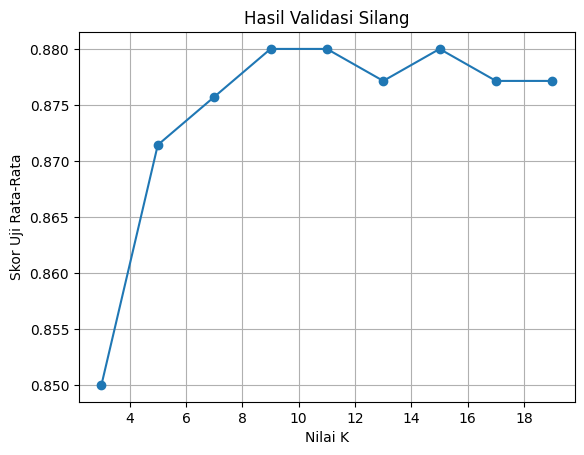

In [34]:
# ambil nilai skor validasi dari grid search
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# plot hasil dari grid search
plt.errorbar(
    [params[i]['n_neighbors'] for i in range(len(params))],
    mean_scores,
    fmt='o-'
)
plt.xlabel('Nilai K')
plt.ylabel('Skor Uji Rata-Rata')
plt.title('Hasil Validasi Silang')
plt.grid(True)
plt.show()

Visualisasi di atas menunjukkan hasil dari validasi silang yang telah dilakukan. Dapat dilihat bahwa titik tertinggi pada grafik terletak pada nilai k yang sama dengan 9.

##Modelling

### Post-Processing


In [35]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

Pada analisis ini akan dilakukan penskalaan, yaitu proses transformasi data numerik sehingga skala nilainya menjadi sama atau seimbang. Pensklaan berguna untuk meningkatkan kinerja model dan memastikan bahwa variabel yang mempunyai skala yang lebih besar tidak mendominasi variabel lainnya dalam proses pembelajaran model.

In [36]:
scaler = StandardScaler()

# fit and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# convert the scaled training data to a Pandas DataFrame
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

# transform the testing data using the fitted scaler
x_test_scaled = scaler.transform(x_test)

# convert the scaled testing data to a Pandas DataFrame
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

Berdasarkan kode di atas, fitur-fitur pada data latih dan data uji akan diubah skala nilainya dengan tujuan untuk menjaga keseimbangan pada nilai-nilai fitur tersebut.

###C4.5

Algoritma C4.5 adalah salah satu algoritma supervised learning yang digunakan untuk membangun model decision tree. C4.5 bekerja dengan membagi dataset menjadi subset yang lebih kecil dan homogen berdasarkan fitur-fitur yang memiliki informasi paling tinggi, dan kemudian membuat keputusan berdasarkan aturan-aturan yang ditemukan pada tree. Algoritma ini dapat digunakan untuk memprediksi penerimaan mahasiswa berdasarkan faktor-faktor yang mempengaruhi dengan akurasi yang tinggi.

In [37]:
# inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()

# train model pada data train
dtc.fit(x_train_scaled_df, y_train)

# evaluasi model pada data test
dtc_pred = dtc.predict(x_test_scaled_df)

###Naive Bayes

Algoritma ini merupakan metode klasifikasi yang menggunakan probabilitas dan asumsi bahwa setiap fitur input adalah independen satu sama lain, sehingga disebut "naive". Dengan memanfaatkan probabilitas, algoritma ini dapat menghasilkan prediksi penerimaan mahasiswa berdasarkan faktor-faktor yang mempengaruhi secara efisien.

In [38]:
class GaussianNB:
    # Constructor
    def __init__(self):
        self.sigmas = dict()
        self.dispersions = dict()
        self.probs = dict()
        self.index = None
        self.targets = None
        self.columns = None
    
    def fit(self, x, y):
        # Convert x to DataFrame
        x = pd.DataFrame(x, columns=self.columns)

        # Store the original index of x
        self.index = x.index

        # Preparing sigma / dispersion dictionaries for numeric columns
        self.sigmas = {}
        self.dispersions = {}
        for column in x.select_dtypes(include=[np.number]):
            self.sigmas[column] = {}
            self.dispersions[column] = {}
            for target in y.unique():
                sample = np.array(x[y.values == target][column])
                self.sigmas[column][target] = sample.std()
                self.dispersions[column][target] = sample.mean()
                self.probs[column] = len(sample) / len(x)

        self.targets = y.unique()
        self.columns = x.columns

    # Predict method
    def predict(self, X):
        predicts = list()
        for row in X.to_numpy():
            target_prob_dict = dict()
            for target in self.targets:
                for x, column in zip(row, self.columns):
                    x = float(x)
                    sigma = self.sigmas[column][target]
                    dispersion = self.dispersions[column][target]
                    prob = self.probs[column]
                    target_prob = ((1 / np.sqrt(np.pi*sigma)) * np.exp(-( (x-dispersion)**2 / (2*sigma**2)))) * prob

                    if target not in target_prob_dict:
                        target_prob_dict[target] = target_prob
                    else:
                        target_prob_dict[target] *= target_prob
                        
            # Get the predicted class based on the highest probability
            predicted_class = max(target_prob_dict, key=target_prob_dict.get)
            predicts.append(predicted_class)
        
        return predicts
    
    def print(self):
        print("Sigmas:")
        for column in self.sigmas:
            print(f"\t{self.columns[column]}")

In [39]:
# create a Gaussian Naive Bayes object
gnb = GaussianNB()

# train the model on the scaled training data
gnb.fit(x_train_scaled_df, y_train)

# make predictions on the scaled testing data
gnb_pred = gnb.predict(x_test_scaled_df)


###KNN

Algoritma KNN (K-Nearest Neighbors) digunakan untuk melakukan klasifikasi atau regresi dengan mencari tetangga terdekat dari data yang akan diprediksi dan menentukan label atau nilai target berdasarkan mayoritas tetangga terdekat. Pada analisis prediksi penerimaan mahasiswa, algoritma KNN akan mencari data mahasiswa lain yang memiliki faktor-faktor yang mirip dengan calon mahasiswa yang akan diprediksi dan menentukan kemungkinan penerimaan berdasarkan jumlah tetangga terdekat yang diterima.



In [40]:
class KNeighbors:
    def __init__(self, n_neighbors=None):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        
    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = np.zeros(X_test.shape[0], dtype=self.y_train.dtype)
        for i, x_test in enumerate(X_test):
            distances = np.sqrt(np.sum((self.X_train - x_test)**2, axis=1))
            indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_classes = self.y_train[indices]
            y_pred[i] = np.argmax(np.bincount(k_nearest_classes))
        return y_pred

In [41]:
# Inisialisasi model KNN dengan k=9
knn = KNeighbors(n_neighbors=9)

# Train model menggunakan data train
knn.fit(x_train_scaled_df, y_train)

# Prediksi label pada data test
knn_pred = knn.predict(x_test_scaled_df)

## Evaluation

Evaluasi pada analisis ini akan dilakukan menggunakan confusion matrix. Confusion matrix merupakan sebuah matriks yang digunakan untuk mengevaluasi kinerja model klasifikasi dengan membandingkan nilai aktual dan prediksi dari suatu model. Terdapat empat nilai dalam confusion matrix, yaitu True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN). Dari nilai-nilai ini, kita dapat menghitung akurasi, presisi, dan recall. Akurasi merupakan rasio prediksi yang benar dari semua prediksi. Presisi merupakan rasio prediksi benar positif dari semua prediksi positif. Recall merupakan rasio prediksi benar positif dari semua kasus positif yang sebenarnya.

Selain ketiga metrik tersebut, f1-score juga digunakan untuk mengevaluasi kinerja model. F1-score adalah harmonic mean dari presisi dan recall. F1-score memberikan nilai rata-rata harmonik dari precision dan recall, yang dianggap lebih cocok untuk dataset yang tidak seimbang. Semakin mendekati 1 nilai dari akurasi, presisi, recall, dan f1-score, maka semakin baik kinerja model yang digunakan.

---



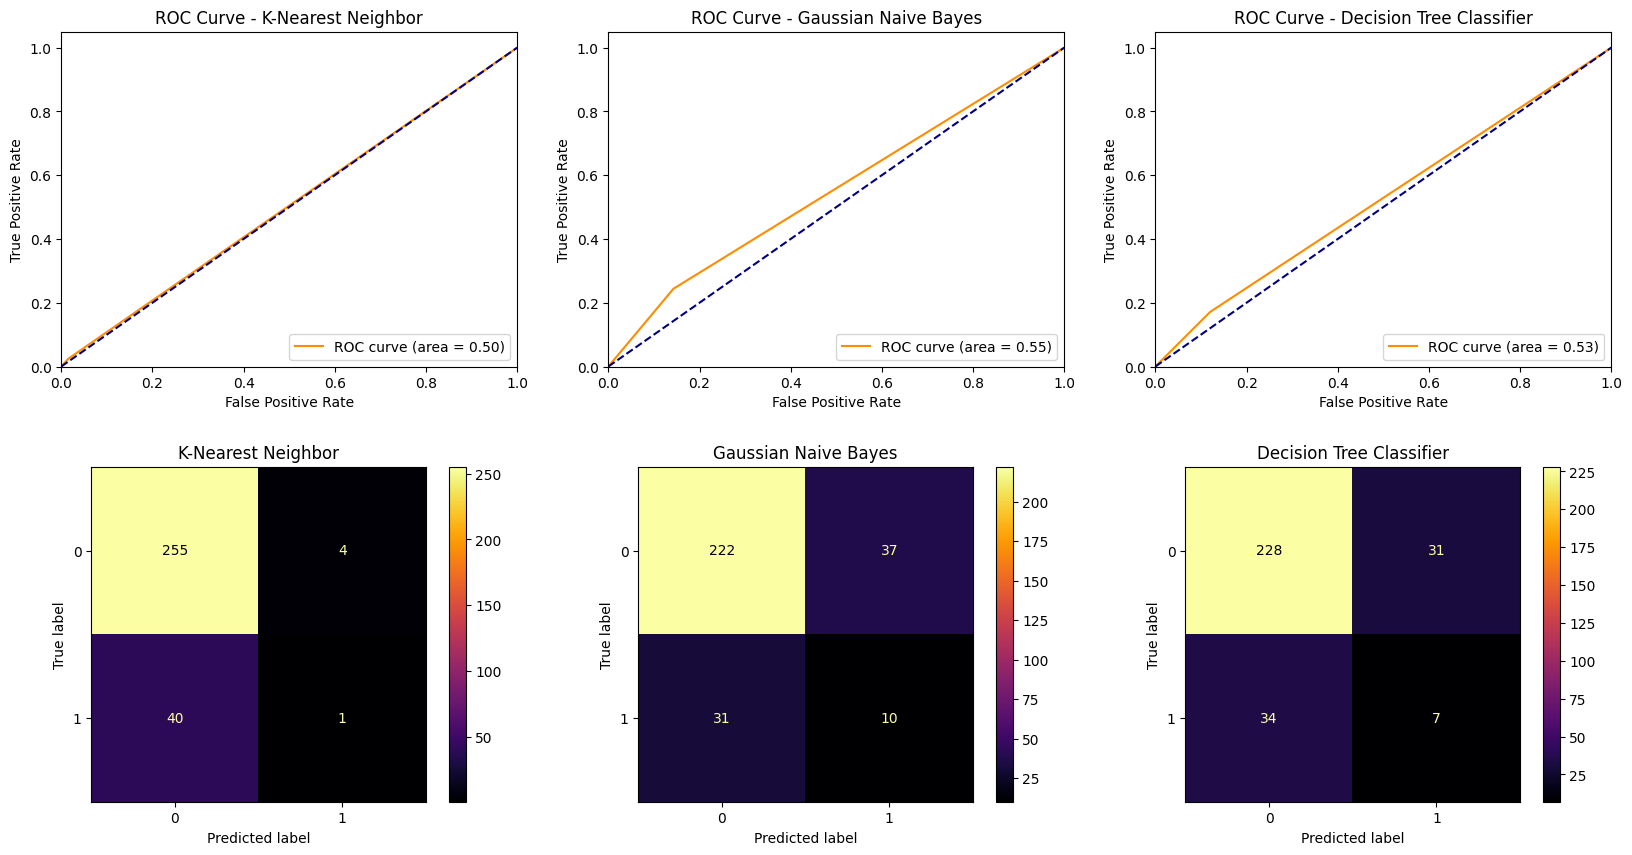

,Accuracy (%),Precision (%),Recall (%),ROC-AUC (%),F1-Score (%)
K-Nearest Neighbor,85.333333,20.000000,2.439024,50.447311,4.347826
Gaussian Naive Bayes,77.333333,21.276596,24.390244,55.052265,22.727273
Decision Tree Classifier,78.333333,18.421053,17.073171,52.552029,17.721519


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# buat list model dan nama model
models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

# inisialisasi list untuk menyimpan hasil evaluasi
acc_scores = []
pre_scores = []
rec_scores = []
roc_scores = []
f1_scores = []

# buat figure dan axes untuk menampilkan visualisasi
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# loop untuk setiap model
for i, model in enumerate(models):
    # prediksi target variabel pada data uji
    y_pred = model.predict(x_test_scaled_df)

    # hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # hitung nilai roc-auc
    roc = roc_auc_score(y_test, y_pred)

    # hitung false positive rate (fpr) dan true positive rate (tpr) untuk kurva roc
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # tampilkan kurva roc
    roc_display = axes[0,i].plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc)
    roc_display = axes[0,i].plot([0, 1], [0, 1], color='navy', linestyle='--')
    roc_display = axes[0,i].set_xlim([0.0, 1.0])
    roc_display = axes[0,i].set_ylim([0.0, 1.05])
    roc_display = axes[0,i].set_xlabel('False Positive Rate')
    roc_display = axes[0,i].set_ylabel('True Positive Rate')
    roc_display = axes[0,i].set_title('ROC Curve - ' + model_names[i])
    roc_display = axes[0,i].legend(loc="lower right")

    # tambahkan baris kosong
    fig.subplots_adjust(hspace=0.3)

    # tampilkan confusion matrix
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=axes[1,i], cmap='inferno')
    cm_display.ax_.set_title(model_names[i])

    # hitung true negative, false positive, false negative, true positive
    tn, fp, fn, tp = cm.ravel()

    # hitung precision dan recall
    ac = (tp + tn) / (tp + fp + fn + tn)
    pr = tp / (tp + fp)
    rc = tp / (tp + fn)
    f1 = 2*pr*rc / (pr+rc)

    # simpan hasil evaluasi pada list
    acc_scores.append(ac * 100)
    pre_scores.append(pr * 100)
    rec_scores.append(rc * 100)
    roc_scores.append(roc * 100)
    f1_scores.append(f1 * 100)

# tampilkan visualisasi
plt.show()

# buat dataframe dari hasil evaluasi
df_eval = pd.DataFrame({'': model_names,
                        'Accuracy (%)': acc_scores,
                        'Precision (%)': pre_scores,
                        'Recall (%)': rec_scores,
                        'ROC-AUC (%)': roc_scores,
                        'F1-Score (%)': f1_scores})

# set index dataframe menjadi kosong
df_eval = df_eval.set_index('')

# ubah nama axis pada index dan kolom
df_eval = df_eval.rename_axis(None, axis=0).rename_axis('', axis=1)

# menampilkan dataframe dengan style untuk highlight nilai tertinggi
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df_eval = df_eval.style.apply(highlight_max, axis=0)

# tampilkan dataframe
display(df_eval)

Berdasarkan visualisasi dan tabel yang telah dibuat, dapat disimpulkan bahwa Gaussian Naive Bayes memiliki kinerja yang lebih baik dibandingkan dengan K-Nearest neighbor dan Decision Tree Classifier. Hal ini disebabkan oleh tingginya angka yang dihasilkan pada visualisasi dan juga pada tabel presisi, recall, dan roc_auc serta f1-score dari ketiga model.

## Deployment

Membuat kesimpulan analisis dan menyimpan data hasil klasifikasi ke dalam sebuah file dengan format csv untuk digunakan dalam Looker Studio (Google Data Studio)

#### Summary
Data pada dataset Heart disease telah dianalisis menggunakan tiga algoritma klasifikasi, yaitu **K-Nearest Neighbor**, **Gaussian Naive Bayes**, dan **C4.5(Decission Tree Classifier)**. Lalu, hasil analisis ini akan dievaluasi menggunakan enam matriks evaluasi pada *Supervised Learning*, yaitu **Confussion Matrix**, **ROC-AUC**, **Accuracy**, **Precision**, **Recal**, dan **F1-Score**. Hasil analisis yang dilakukan menunjukkan rata - rata persentase dari masing - masing matriks evaluasi terhadap ketiga algoritma ini dibawah 50% kecuali Accuracynya, artinya dataset yang digunakan tidak cocok untuk ketiga algoritma tersebut, perlu ditela'ah lebih lanjut. Namun, hasil evaluasi paling baik terdapat pada kinerja algoritma **Gaussian Naive Bayes** yang rata - rata persentasenya lebih tinggi dibandingkan dengan algoritma lain, dengan ini dapat disimpulkan bahwa algoritma klasifikasi **Gaussian Naive Bayes** adalah algoritma yang dapat digunakan untuk analisis dataset Heart Disease

#### Save Data
Dataset yang telah dibersihkan pada tahap **Data Preparation** akan disimpan, karena dataset pada proses itu lah yang dapat dikatakan paling baik dan dapat digunakan untuk analisis lainnya, dataset disimpan dengan mengecualikan nilai index, agar proses penggunaannya lebih optimal

In [43]:
df_deploy.to_csv('Heart Disease - Deployment.csv', index=False)